In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.special import inv_boxcox

In [3]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df = data.copy()

In [5]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [6]:
df['Attrition_num'] = df['Attrition'].map({'Yes':1,'No':0})

In [8]:
attrition_rate = df['Attrition_num'].mean() *100
attrition_rate

np.float64(16.122448979591837)

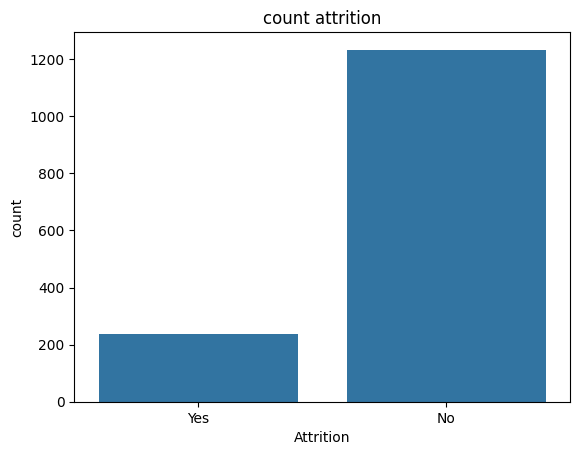

In [9]:
plt.Figure(figsize=(8,6))
sns.countplot(data=df,x='Attrition')
plt.title('count attrition')
plt.show()

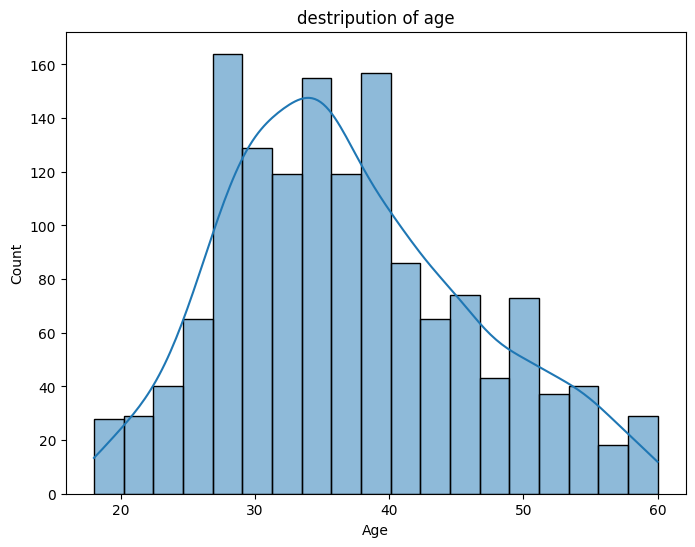

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Age',kde= True)
plt.title('destripution of age')
plt.show()

In [12]:
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

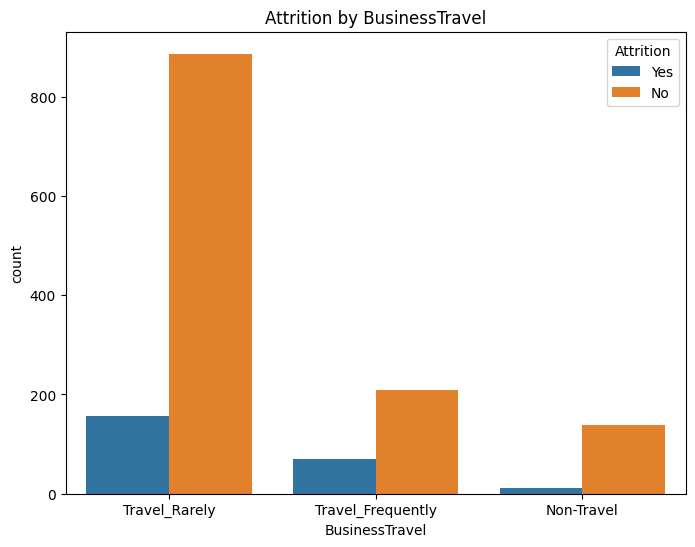

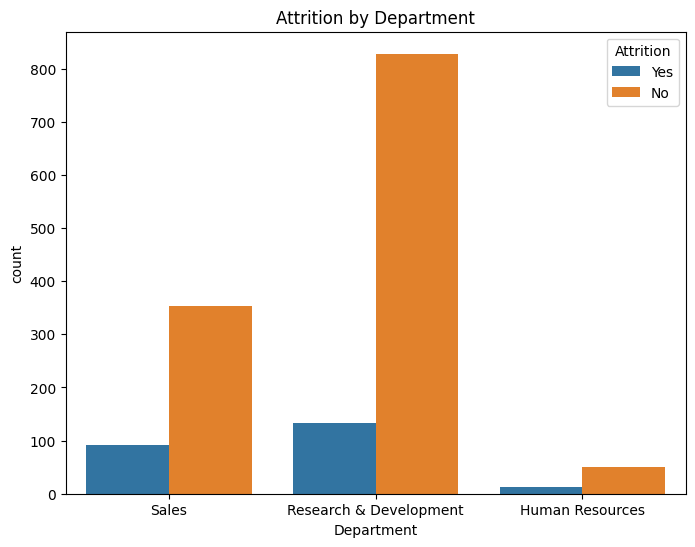

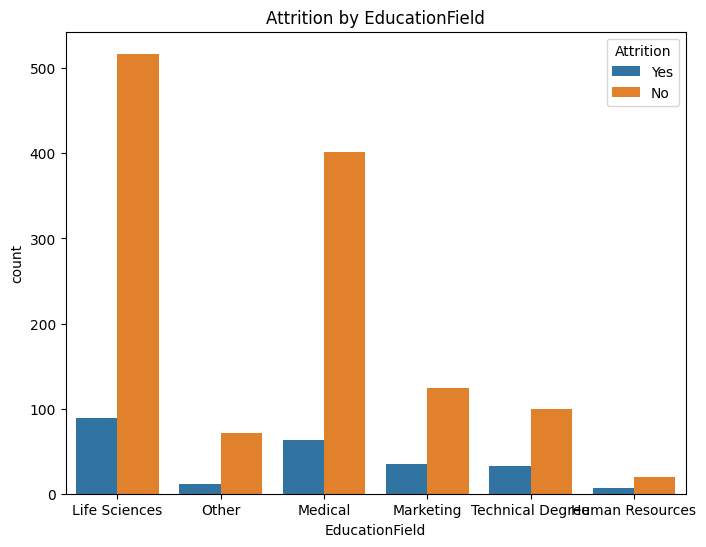

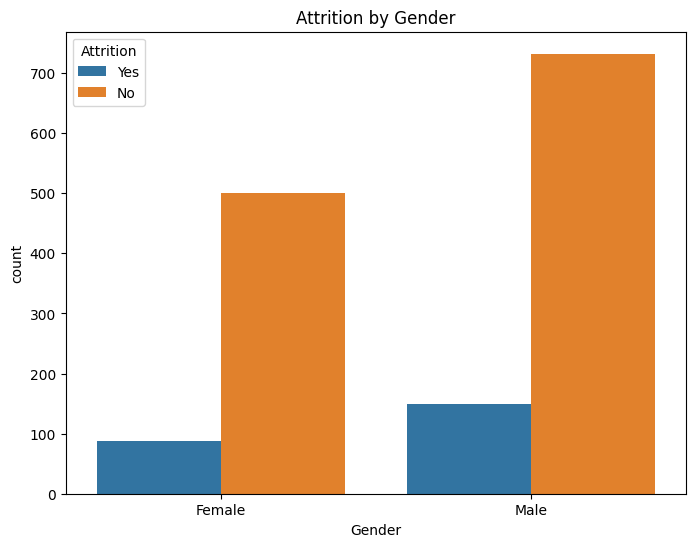

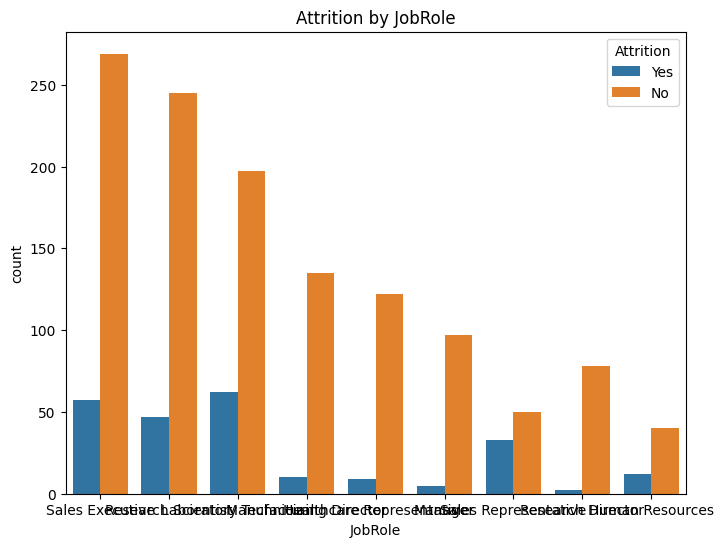

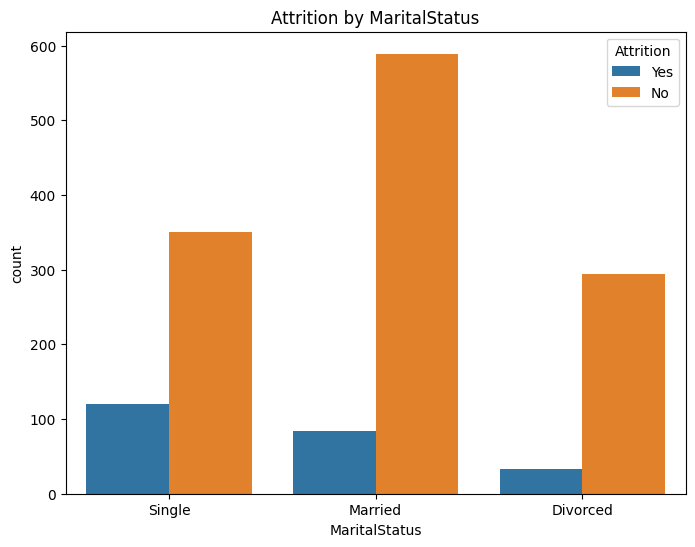

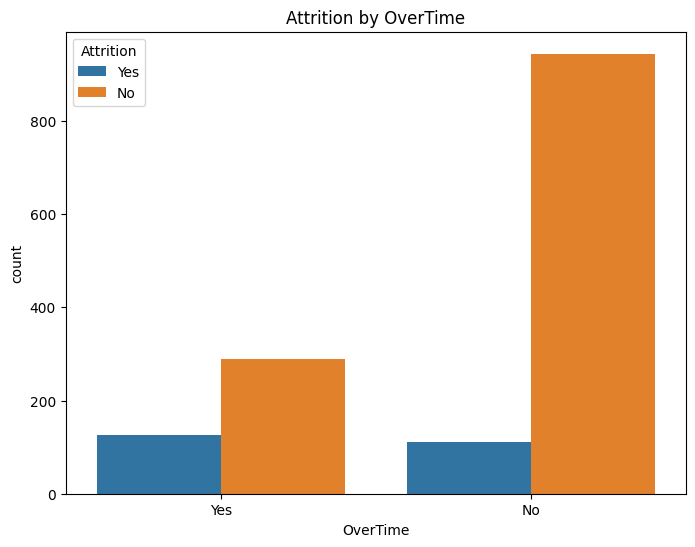

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data =df,x=col,hue='Attrition')
    plt.title(f'Attrition by {col}')
    plt.show()

In [18]:
grouped_data = df.groupby('Department')['Attrition_num'].sum()

In [19]:
grouped_data

Department
Human Resources            12
Research & Development    133
Sales                      92
Name: Attrition_num, dtype: int64

In [20]:
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
                  'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears',
                  'YearsAtCompany', 'YearsInCurrentRole',
                  'YearsSinceLastPromotion', 'YearsWithCurrManager']

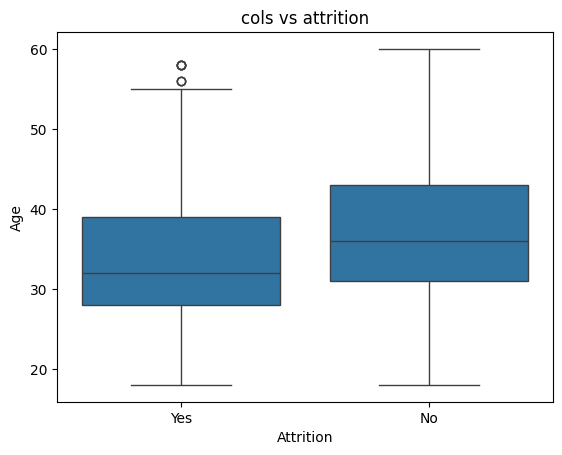

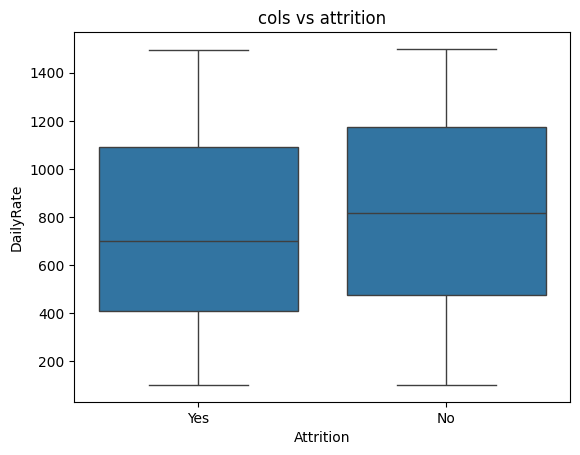

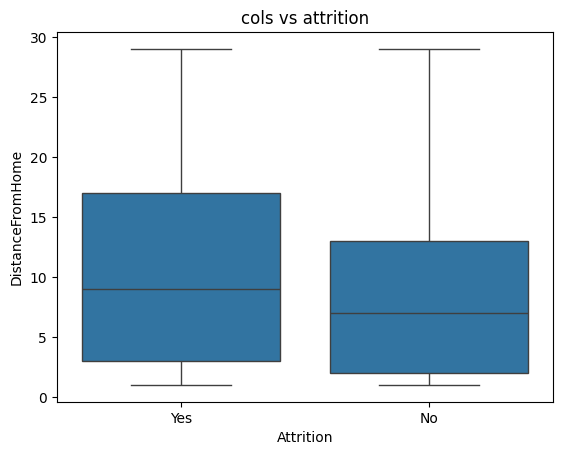

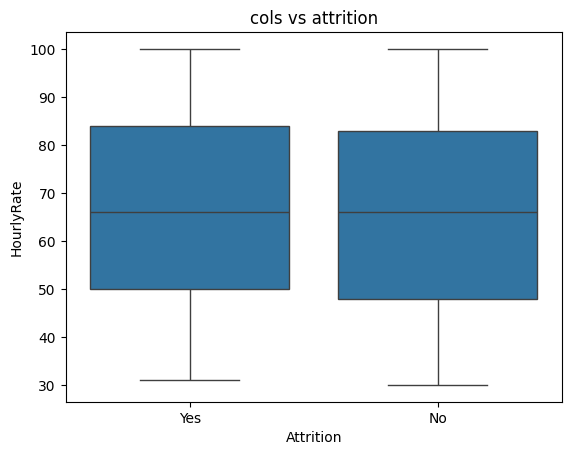

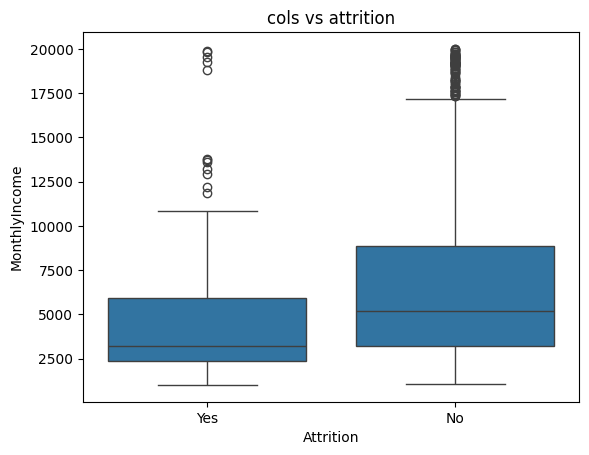

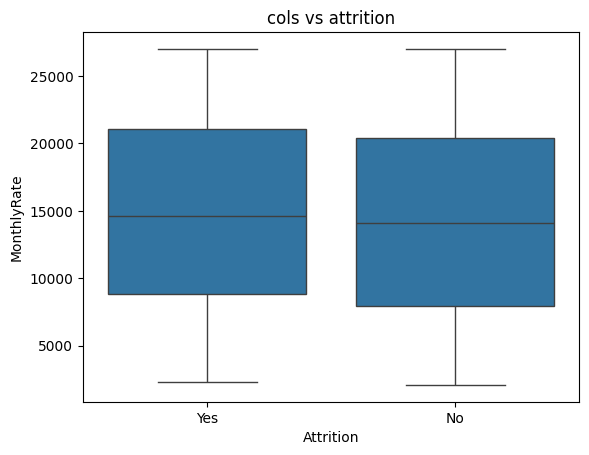

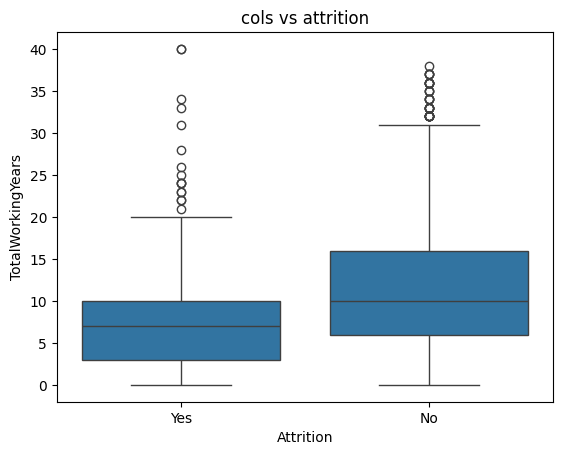

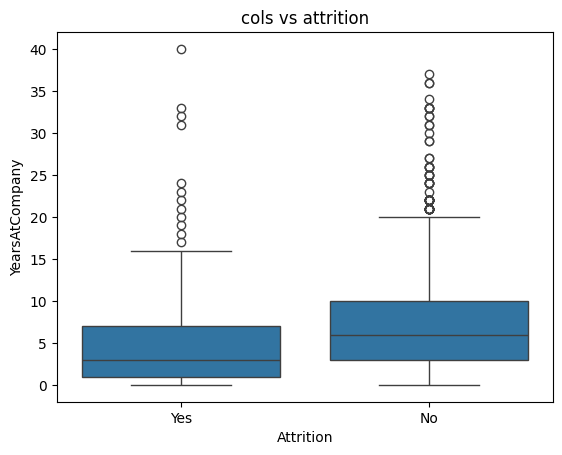

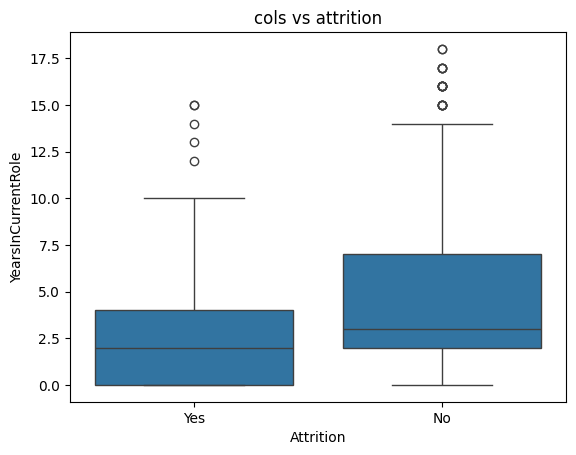

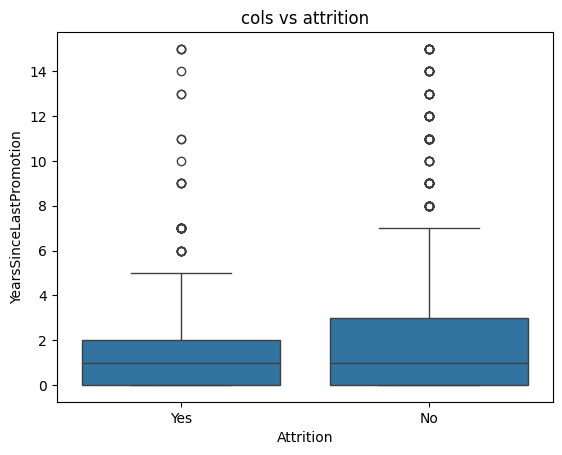

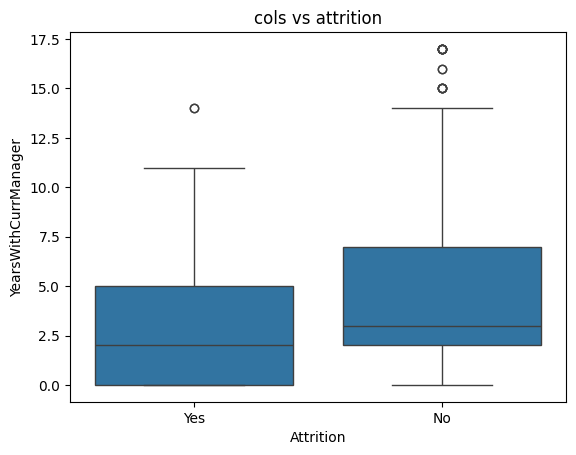

In [21]:
for col in numerical_cols:
    plt.Figure(figsize=(8,6))
    sns.boxplot(data=df,x='Attrition',y=col)
    plt.title('cols vs attrition')
    plt.show()

In [22]:
corr = df.corr(numeric_only= True)


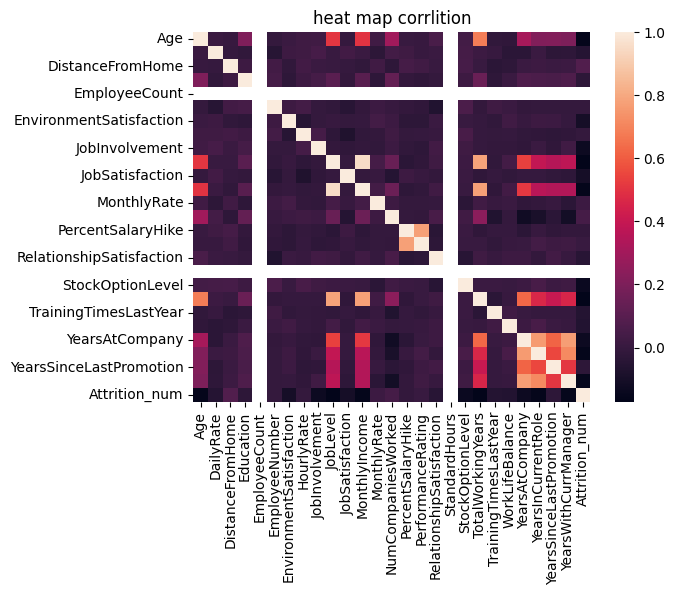

In [23]:
plt.Figure(figsize=(8,6))
sns.heatmap(corr,annot=False)
plt.title('heat map corrlition')
plt.show()